In [52]:
# importing the lib.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [ ]:
# data inspection

In [2]:
Adv_data = pd.read_csv('Advertising.csv')

In [3]:
Adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Adv_data.shape

(200, 5)

In [5]:
Adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
Adv_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

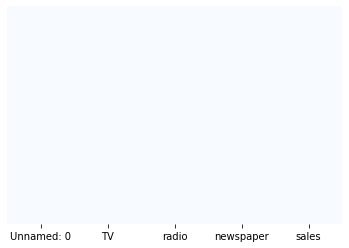

In [60]:
sns.heatmap(Adv_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

In [7]:
Adv_data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

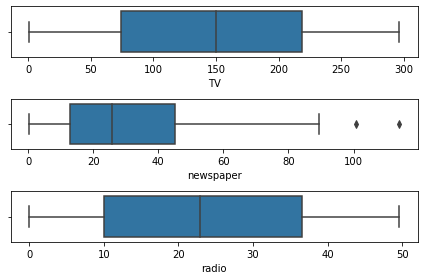

In [11]:
# outliner Analysis
fig, axs= plt.subplots(3,figsize =(6,4))
plt1 = sns.boxplot(Adv_data['TV'],ax = axs[0])
plt2 = sns.boxplot(Adv_data['newspaper'],ax = axs[1])
plt3 = sns.boxplot(Adv_data['radio'],ax = axs[2])
plt.tight_layout()



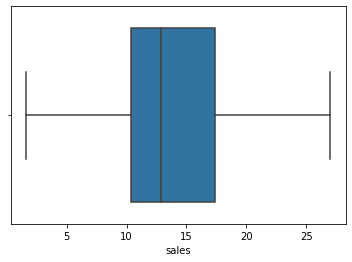

In [13]:
# sales target
sns.boxplot(Adv_data['sales'])
plt.show()

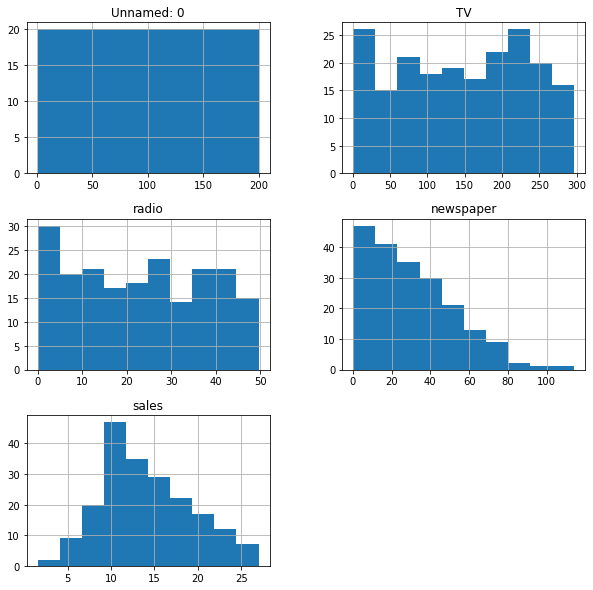

In [62]:
# to check all variables at once

Adv_data.hist( bins = 10, figsize = (10,10))
plt.show()

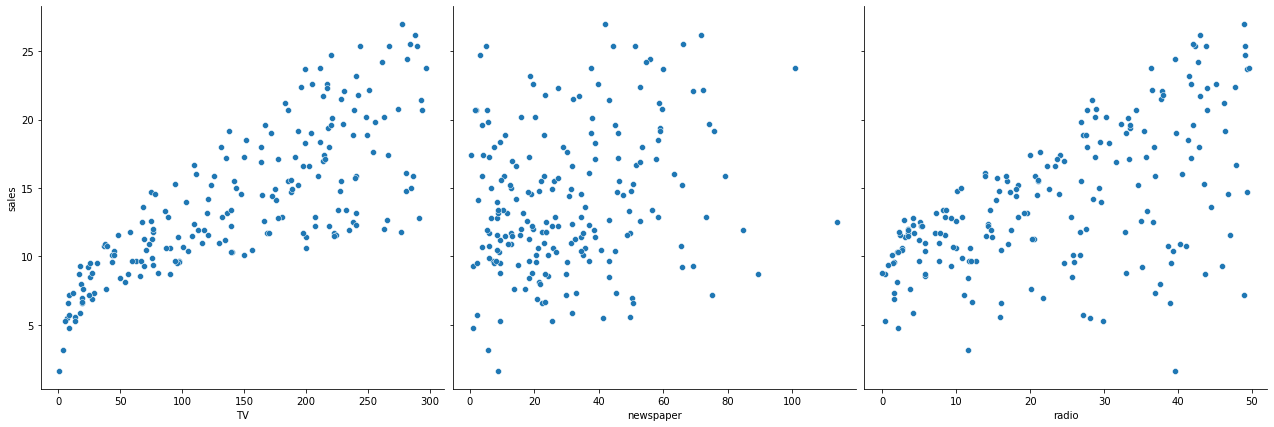

In [17]:
sns.pairplot(Adv_data, x_vars = ['TV','newspaper','radio'], y_vars= 'sales', height = 6)

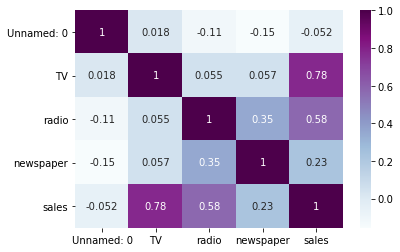

In [20]:
# to check the corelation
sns.heatmap(Adv_data.corr(), cmap = 'BuPu' ,annot= True)
plt.show()

In [21]:
# define X AND Y 
X = Adv_data['TV']
Y = Adv_data['sales']

In [22]:
print(X)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [23]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [27]:
# SPLITTING DATASET 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3, random_state=100)

In [28]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [29]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [36]:
X_train_sm = sm.add_constant(X_train)

In [37]:
lnr = sm.OLS(Y_train, X_train_sm).fit()

In [40]:
lnr.params

const    6.989666
TV       0.046497
dtype: float64

In [41]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           2.84e-30
Time:                        19:52:21   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

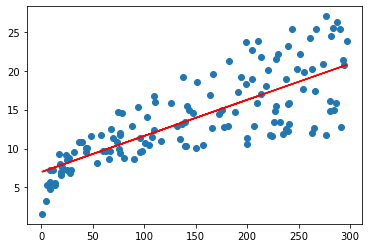

In [46]:
plt.scatter(X_train, Y_train)
plt.plot(X_train,6.9897+ 0.0464 *X_train,'r')
plt.show()

In [47]:

Y_train_pred = lnr.predict(X_train_sm)
resid = (Y_train - Y_train_pred)

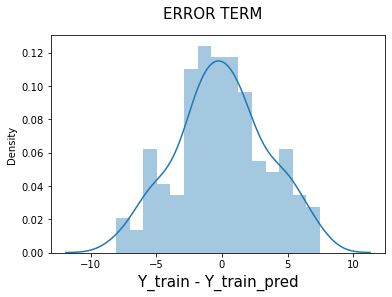

In [49]:
fig = plt.figure()
sns.distplot(resid, bins = 15)
fig.suptitle('ERROR TERM', fontsize=15)
plt.xlabel('Y_train - Y_train_pred',fontsize=15)
plt.show()

In [50]:
X_test_sm = sm.add_constant(X_test)
y_pred = lnr.predict(X_test_sm)


In [51]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [54]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.8241456288327016

In [55]:
r_squared = r2_score(Y_test,y_pred)

In [56]:
r_squared

0.59429872677833

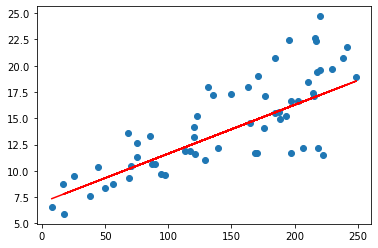

In [58]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,6.9897+ 0.0464 *X_test,'r')
plt.show()